In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Car Data Set 

In [7]:
dataset=pd.read_csv("car data.csv")

In [9]:
dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


## Importing the sklearn for regression model selection

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data processing and Data cleaning 

In [18]:
dataset.shape

(301, 9)

In [21]:
# geting the info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [24]:
# checking the number of missing values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [28]:
# checking the indiviual distribution
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Data encoding

In [45]:
# fueltype
dataset.replace({'Fuel_Type' :{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# Seller type
dataset.replace({'Seller_Type' :{'Dealer':0,'Individual':1}},inplace=True)
#Transmission
dataset.replace({'Transmission' :{'Manual':0,'Automatic':1}},inplace=True)

In [46]:
dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


# Spliting the data  and target

In [47]:
# Remove the car selling price in X
X= dataset.drop(['Car_Name',"Selling_Price"],axis=1)
# saving the price in Y
Y=dataset['Selling_Price']

In [48]:
print(X)


     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [49]:
# target variable to test and train
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Spliting Testing and training data

In [50]:
# 10% of test data and 90% of data is traning data
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.1,random_state=2)


# linear Regression model


## model training

In [51]:
# load linear regression
Lin_reg=LinearRegression()

In [53]:
Lin_reg.fit(X_train,Y_train)

LinearRegression()

# model evaluation

## predict the training data

In [55]:
# predict the training data set
data_pri=Lin_reg.predict(X_train)

In [59]:
# compare with R sqaured Error
error_score=metrics.r2_score(Y_train,data_pri)
print("Error Score ---",error_score)

Error Score --- 0.9616016091605246


# Visualize the actual prices and predict

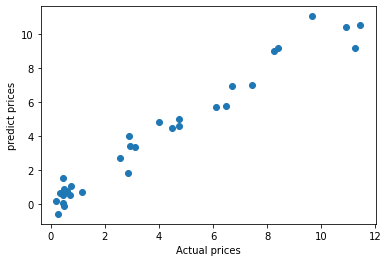

In [60]:
plt.scatter(Y_train,data_pri)
plt.xlabel("Actual prices")
plt.ylabel("predict prices")
plt.title("Actual price vs Predict price")
plt.show()

In [61]:
# test data
test_data_pri=Lin_reg.predict(X_test)

In [62]:
# compare with R sqaured Error
error_score=metrics.r2_score(Y_test,test_data_pri)
print("Error Score test ---",error_score)

Error Score test --- 0.7539954361031181


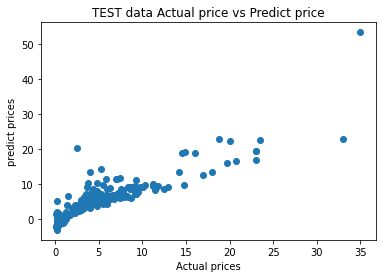

In [63]:
plt.scatter(Y_test,test_data_pri)
plt.xlabel("Actual prices")
plt.ylabel("predict prices")
plt.title("TEST data Actual price vs Predict price")
plt.show()